
## The Results of Stop and Frisk: What Contributes Most to Arrests?

*Note: All of the code associated with this project, as well as the data used, is accessible at my GitHub repository [here](https://github.com/SeanAmmirati/stats-works/tree/master/projects/NYPD%20Stop%20and%20Frisk).*

*This contains all of the code used in [this project](NYPD_stop_and_frisk.html), unannotated.*
# Introduction
In this project I will be looking at a dataset available from the city of New York about the results of the Stop, Question and Frisk policy.

Which factors lead to the highest likelihood of arrest?

The data is a collection of 22,564 cases of Stop, Question and Frisk in the City of New York in 2015. There are 112 variables which were measured. A majority of the variables in the dataset are categorical variables relating to the incident itself, while a few represent the age, race, height, weight, and sex of the person who was on the receiving end of the policy.

Stop and Frisk has been a controversial policy in New York City for quite some time. Many feel that it is a violation of privacy, that it is unconstitutional, or that the policy is inherently racist - that it disproportionately affects minorities and people of color. Meanwhile, there are others who support the policy, believing stop and frisk to keep people safe from terrorists and other wrongdoers.

As a result of this and other recent controversies involving police across the country, the NYPD has been getting a lot of negative press over the way it addresses these racial problems. What I aim to discover by analyzing this dataset are the main contributing factors to whether a person is arrested or not in a stop and frisk incident.

I will be using a few different methods of analysis to determine the best model to use in predicting whether a person will be arrested or not. Because the response variable, arstmade, is a qualitative, binary variable, I will be using categorical methods. These include logistic regression,  K-Nearest Neighbors analysis and tree methods (like bagging, random forests, boosting).




In [3]:
set.seed(43)

install.packages('tree')
require(ggplot2)
require(tree)
require(class)
require(randomForest)

download_link <- "http://www.nyc.gov/html/nypd/downloads/zip/analysis_and_planning/2015_sqf_csv.zip"
tmp <- tempfile()
download.file(download_link, tmp)
mydata <- read.csv(unz(tmp, "2015_sqf_csv.csv"))
unlink(tmp)

sum(is.na(mydata))
nrow(mydata) * ncol(mydata)
names(mydata)


napercol <- list()
for (i in 1:ncol(mydata)) {
    napercol[[i]] <- sum(is.na(mydata[, i]))
}

mydata <- mydata[, napercol == 0]

lvllist <- list()
for (i in 1:ncol(mydata)) {
    lvllist[[i]] <- length(levels(mydata[, i]))
}

attach(mydata)
height <- 12 * ht_feet + ht_inch
mydata <- data.frame(mydata, height)
mydata <- mydata[, (lvllist < 10) & (lvllist != 1)]
mydata <- mydata[, -c(1, 2, 3, 4, 15, 16, 18, 78, 79, 83, 84)]
mydata <- na.omit(mydata)
mydata <- mydata[mydata$age < 100, ]

train <- sample(1:nrow(mydata), 3 * nrow(mydata)/4)
mydata.test <- mydata[-train, ]
arrest.test <- mydata$arstmade[-train]

attach(mydata)


# descriptive
sum(arstmade == "Y")/nrow(mydata)
sum(sex == "M")/nrow(mydata)
sum(forceuse != " ")/nrow(mydata)
sum(race == "B")/nrow(mydata)
sum(sumissue == "Y")/nrow(mydata)
sum(arstmade == "Y")/sum(sumissue == "Y")
sum(sb_other == "Y")/nrow(mydata)
sum(sb_other == "Y")/sum(searched == "Y")
sum(pf_other == "Y")/nrow(mydata)

mean(mydata$age)
black <- as.factor(race == "B")
white <- as.factor(race == "W")
nonwhite <- as.factor(race != "W")
summary(mydata)

Installing package into 'C:/Users/ginge/Anaconda3/Lib/R/library'
(as 'lib' is unspecified)


package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ginge\AppData\Local\Temp\RtmpMrc3nQ\downloaded_packages


Loading required package: ggplot2
Loading required package: tree
Loading required package: class
Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



[1] 173895

[1] 2527056

[1] "year"     "pct"      "ser_num"  "datestop" "timestop" "recstat" 
  [7] "inout"    "trhsloc"  "perobs"   "crimsusp" "perstop"  "typeofid"
 [13] "explnstp" "othpers"  "arstmade" "arstoffn" "sumissue" "sumoffen"
 [19] "compyear" "comppct"  "offunif"  "officrid" "frisked"  "searched"
 [25] "contrabn" "adtlrept" "pistol"   "riflshot" "asltweap" "knifcuti"
 [31] "machgun"  "othrweap" "pf_hands" "pf_wall"  "pf_grnd"  "pf_drwep"
 [37] "pf_ptwep" "pf_baton" "pf_hcuff" "pf_pepsp" "pf_other" "radio"   
 [43] "ac_rept"  "ac_inves" "rf_vcrim" "rf_othsw" "ac_proxm" "rf_attir"
 [49] "cs_objcs" "cs_descr" "cs_casng" "cs_lkout" "rf_vcact" "cs_cloth"
 [55] "cs_drgtr" "ac_evasv" "ac_assoc" "cs_furtv" "rf_rfcmp" "ac_cgdir"
 [61] "rf_verbl" "cs_vcrim" "cs_bulge" "cs_other" "ac_incid" "ac_time" 
 [67] "rf_knowl" "ac_stsnd" "ac_other" "sb_hdobj" "sb_outln" "sb_admis"
 [73] "sb_other" "repcmd"   "revcmd"   "rf_furt"  "rf_bulg"  "offverb" 
 [79] "offshld"  "forceuse" "sex"      "race"     "dob"      "age"     
 [85] "ht_feet"  "ht_inch"  "weight"   "haircolr" "eyecolor" "build"   
 [91] "othfeatr" "addrtyp"  "rescode"  "premtype" "premname" "addrnum" 
 [97] "stname"   "stinter"  "crossst"  "aptnum"   "city"     "state"   
[103] "zip"      "addrpct"  "sector"   "beat"     "post"     "xcoord"  
[109] "ycoord"   "dettypCM" "lineCM"   "detailCM"

The following object is masked _by_ .GlobalEnv:

    height

The following objects are masked from mydata (pos = 3):

    ac_assoc, ac_cgdir, ac_evasv, ac_incid, ac_inves, ac_other,
    ac_proxm, ac_rept, ac_stsnd, ac_time, age, arstmade, asltweap,
    build, city, contrabn, cs_bulge, cs_casng, cs_cloth, cs_descr,
    cs_drgtr, cs_furtv, cs_lkout, cs_objcs, cs_other, cs_vcrim,
    detailCM, explnstp, forceuse, frisked, inout, knifcuti, offshld,
    offunif, offverb, othpers, othrweap, perobs, pf_baton, pf_drwep,
    pf_grnd, pf_hands, pf_hcuff, pf_other, pf_pepsp, pf_ptwep, pf_wall,
    pistol, race, radio, recstat, repcmd, revcmd, rf_attir, rf_bulg,
    rf_furt, rf_knowl, rf_othsw, rf_rfcmp, rf_vcact, rf_vcrim,
    rf_verbl, riflshot, sb_admis, sb_hdobj, sb_other, sb_outln,
    searched, sex, sumissue, timestop, trhsloc, typeofid, weight



[1] 0.1759844

[1] 0.9243178

[1] 0.2746867

[1] 0.5294196

[1] 0.02613101

[1] 6.734694

[1] 0.1075016

[1] 0.577327

[1] 0.02648653

[1] 27.63119

    timestop    recstat   inout     trhsloc       perobs       typeofid 
 Min.   :   0    : 2845   I: 4211   H: 3357   Min.   :  0.00   O:  432  
 1st Qu.: 507   1:14661   O:18291   P:18245   1st Qu.:  1.00   P:12960  
 Median :1623   9:   10             T:  900   Median :  1.00   R:  623  
 Mean   :1377   A: 4986                       Mean   :  2.64   V: 8487  
 3rd Qu.:2052                                 3rd Qu.:  2.00            
 Max.   :2359                                 Max.   :535.00            
                                                                        
 explnstp  othpers   arstmade  sumissue  offunif   frisked   searched 
 N:   28   N:15780   N:18542   N:21914   N: 9965   N: 7289   N:18312  
 Y:22474   Y: 6722   Y: 3960   Y:  588   Y:12537   Y:15213   Y: 4190  
                                                                      
                                                                      
                                                             

# Data
The data comes from the City of New York. It is a collection of 22,564 observations of 112 variables. Some of these variables had to be removed, as they did not contribute any information (for instance, they were the same value for all observations) or they had too many missing values. After removing these variables from the dataset, I had 75 variables to work with, with 22,563 observations.

For example, lineCM was a redundant variable, as it had 1's for all observations. I also removed apt number, state and zip, as many of these values were left blank. Overall, none of the variables I was very interested in had any missing values, so removing these variables likely had very little effect on the analysis, if any.

There were two variables for height (ht_inch and ht_feet) which I combined into one (height).

The response variable I used for all of the following analyses was arstmade, which was a categorical variable that had values of "Y" for yes and "N" for no. Many of the categorical variables in the dataset followed this pattern. The percentage of arrests in all cases was 0.18, meaning that around 18% of the stops resulted in an arrest.

The mean age of people who were stopped and frisked was around 29 years. Most of the people who were stopped were males (92.42%). Force was used in about 27% of the cases.

In investigating whether blacks were targeted more frequently and if they were arrested more frequently, I created a categorical variable that was 1 if the person was black and 0 otherwise. Below is a bar graph of the arrests, with the colorings indicating the percentage who were black and non-black.

It does not seem from these graphs alone that blacks were more likely to be arrested, since they have roughly half of the bars in both instances. However, it does seem like there are a disproportionate number of blacks who are stopped and frisked in the first place, which is shown in the second graph. With blacks making up roughly 23% of the population, it is surprising that almost double that (53%) of the people who were stopped were black


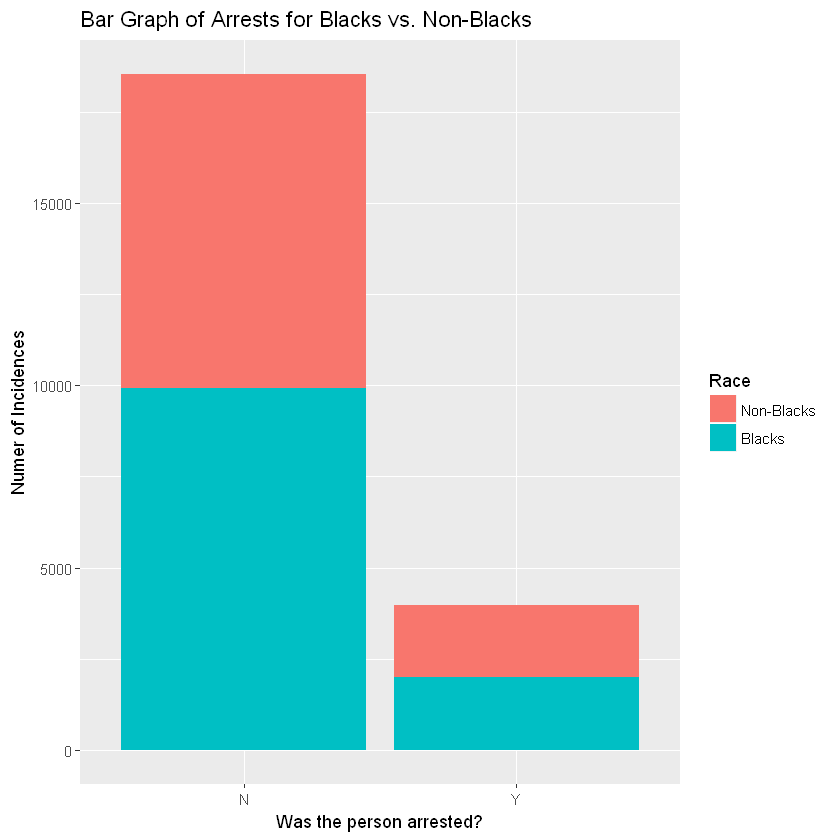

In [4]:
ggplot(mydata, aes(arstmade)) + geom_bar(aes(fill = black)) + ggtitle("Bar Graph of Arrests for Blacks vs. Non-Blacks") + 
    xlab("Was the person arrested?") + ylab("Numer of Incidences") + scale_fill_discrete(name = "Race", 
    labels = c("Non-Blacks", "Blacks"))

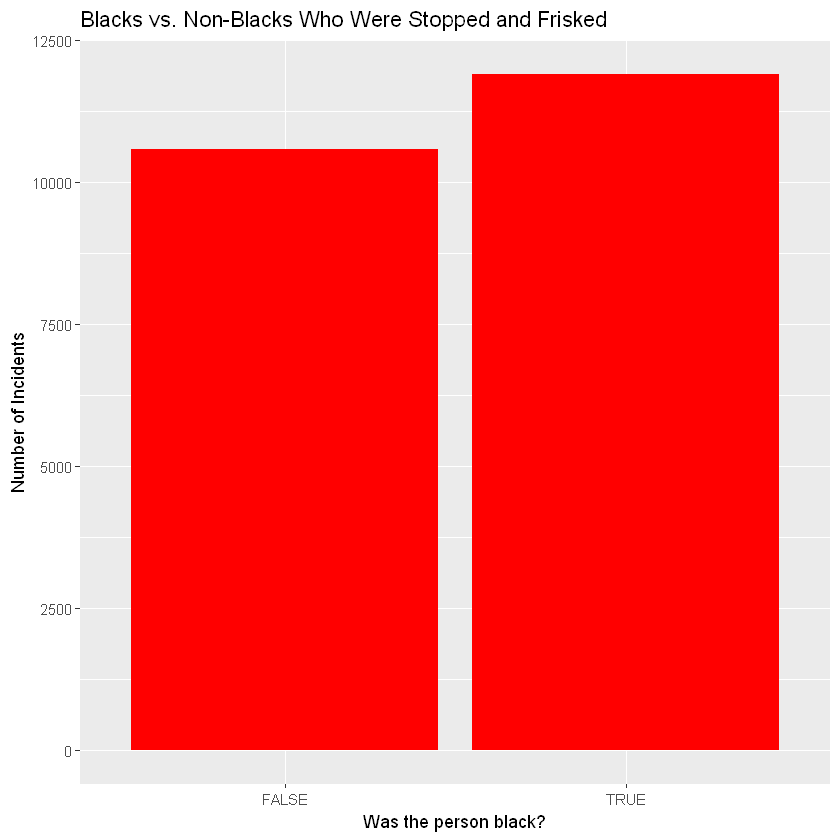

In [5]:
ggplot(mydata, aes(black)) + geom_bar(fill = "red") + ggtitle("Blacks vs. Non-Blacks Who Were Stopped and Frisked") + 
    xlab("Was the person black?") + ylab("Number of Incidents")

Some more interesting things found in the descriptive statistics:

Around 6.7 times more people were arrested than given summonses. That is, only 2% of the people were given summonses.

None of the people who were stopped had a machine gun, so I removed this variable from the data. I removed any variable which had levels that were exactly one, as this indicated that there was no variation between observations.

Although the suspected crime variable (crimsusp) was of interest to me in my analysis, I found the data to be inconsistent in how it was recorded. For instance, if it was a felony, the officer had data entered that had both "FEL" and "FELONY" in two different cases. Of course, R would not be able to recognize the fact that these are the same, and would treat them as separate variables.

As such, I decided to remove any variables which had levels larger than 10, as this would indicate that the data was too separated to be meaningful. Since much of this information is contained in the categorical variables (such as the rs variables, which had different values for different reasons for stopping the person), it was relatively inconsequential in my analysis to do so.

There were also groupings which could raise doubt as to whether the information recorded was accurate. Of primary concern to me was pf_other (physical force used: other), rs_other (reason for search: other) and ac_other (additional circumstances: other). These are not very informative, and could be raise a speculative point about whether these were truly extraordinary cases or if they were omitted for other reasons. Of course, that is merely speculation, but it is important to note that this is a source of potential inconsistency and unreliability from the dataset.

Even worse, some of these variables contributed a lot to the models which I have fit. Below shows a bar graph of the number of arrests conditional on whether the reason for search was classified as "other."


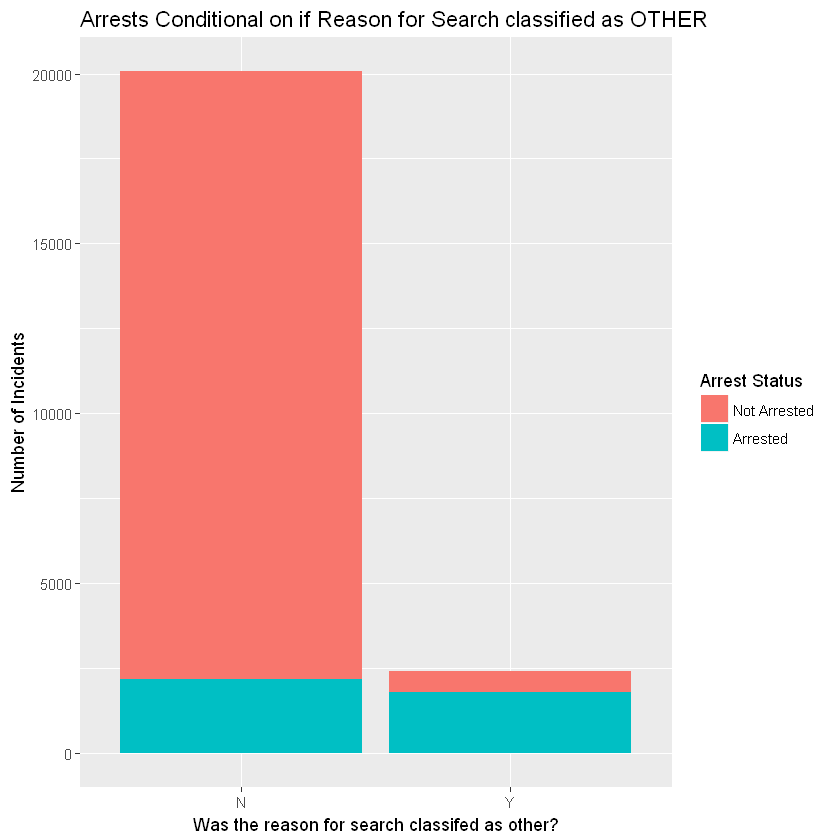

In [6]:
ggplot(mydata, aes(sb_other)) + geom_bar(aes(fill = arstmade)) + ggtitle("Arrests Conditional on if Reason for Search classified as OTHER") + 
    xlab("Was the reason for search classifed as other?") + ylab("Number of Incidents") + 
    scale_fill_discrete(name = "Arrest Status", labels = (c("Not Arrested", "Arrested")))


This confirms the results of the analysis below, as this variable has a large effect on whether the person was arrested or not. If the person was classified as being searched for other reasons not specified, they were arrested quite often. This leads to a limitation of the data and interpretation - we can not determine what the true reasons were. sb_other accounted for around 10.7% of all the cases, and 57.6% of all the people who were searched.

## Analysis and Model Fitting

# Logistic Regression

I separated the data into two sets - test data and training data. The training data was randomly sampled from ¾ of the data.

I began my analysis by using a logistic regression model to predict arstmade on all of the other variables. This was because the response variable was categorical, so it was necessary to use a logistic model instead of a linear model with normal errors. I then used stepwise reduction to determine the best fit and to reduce the amount of variables used. Since there were a great deal of variables that came up insignificant in the full model, it reduced the model quite a lot.

I used the glm function using the binomial family to model the data.

Below is a summary of the results of the models:


In [7]:
logistfullmodel <- glm(arstmade ~ ., data = mydata[train, ], family = binomial)
summary(logistfullmodel)

# step(logistfullmodel)

stepwiselogmodel <- glm(formula = arstmade ~ recstat + inout + trhsloc + perobs + 
    typeofid + sumissue + offunif + frisked + searched + contrabn + pistol + knifcuti + 
    othrweap + pf_hands + pf_wall + pf_grnd + pf_drwep + pf_hcuff + pf_pepsp + pf_other + 
    radio + ac_rept + rf_vcrim + rf_othsw + ac_proxm + rf_attir + cs_objcs + cs_casng + 
    cs_lkout + cs_cloth + cs_drgtr + ac_evasv + ac_assoc + rf_rfcmp + rf_verbl + 
    cs_vcrim + cs_bulge + cs_other + rf_knowl + ac_other + sb_hdobj + sb_other + 
    revcmd + rf_furt + rf_bulg + forceuse + sex + race + age + weight + city + detailCM, 
    family = binomial, data = mydata[train, ])

summary(stepwiselogmodel)


Call:
glm(formula = arstmade ~ ., family = binomial, data = mydata[train, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7188  -0.3688  -0.2544  -0.1509   3.8891  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -3.603e-01  1.098e+00  -0.328 0.742736    
timestop      -5.247e-05  3.830e-05  -1.370 0.170732    
recstat1       3.513e-01  1.029e-01   3.414 0.000640 ***
recstat9      -1.984e+00  2.315e+00  -0.857 0.391350    
recstatA      -1.814e-01  1.186e-01  -1.530 0.126081    
inoutO        -8.448e-01  8.111e-02 -10.415  < 2e-16 ***
trhslocP      -8.829e-01  1.264e-01  -6.987 2.81e-12 ***
trhslocT      -1.433e+00  1.497e-01  -9.576  < 2e-16 ***
perobs         8.119e-03  3.385e-03   2.398 0.016477 *  
typeofidP      4.639e-02  2.062e-01   0.225 0.822032    
typeofidR     -1.221e+00  3.381e-01  -3.612 0.000303 ***
typeofidV     -1.538e-01  2.087e-01  -0.737 0.461056    
explnstpY     -5.317e-01  7.951e-01  -0.669 0.5


Call:
glm(formula = arstmade ~ recstat + inout + trhsloc + perobs + 
    typeofid + sumissue + offunif + frisked + searched + contrabn + 
    pistol + knifcuti + othrweap + pf_hands + pf_wall + pf_grnd + 
    pf_drwep + pf_hcuff + pf_pepsp + pf_other + radio + ac_rept + 
    rf_vcrim + rf_othsw + ac_proxm + rf_attir + cs_objcs + cs_casng + 
    cs_lkout + cs_cloth + cs_drgtr + ac_evasv + ac_assoc + rf_rfcmp + 
    rf_verbl + cs_vcrim + cs_bulge + cs_other + rf_knowl + ac_other + 
    sb_hdobj + sb_other + revcmd + rf_furt + rf_bulg + forceuse + 
    sex + race + age + weight + city + detailCM, family = binomial, 
    data = mydata[train, ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7416  -0.3693  -0.2555  -0.1531   3.8643  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -1.1394455  0.3563078  -3.198 0.001384 ** 
recstat1       0.3575529  0.1023959   3.492 0.000480 ***
recstat9      -2.0037225  2.3393201  -0.857 0.3916

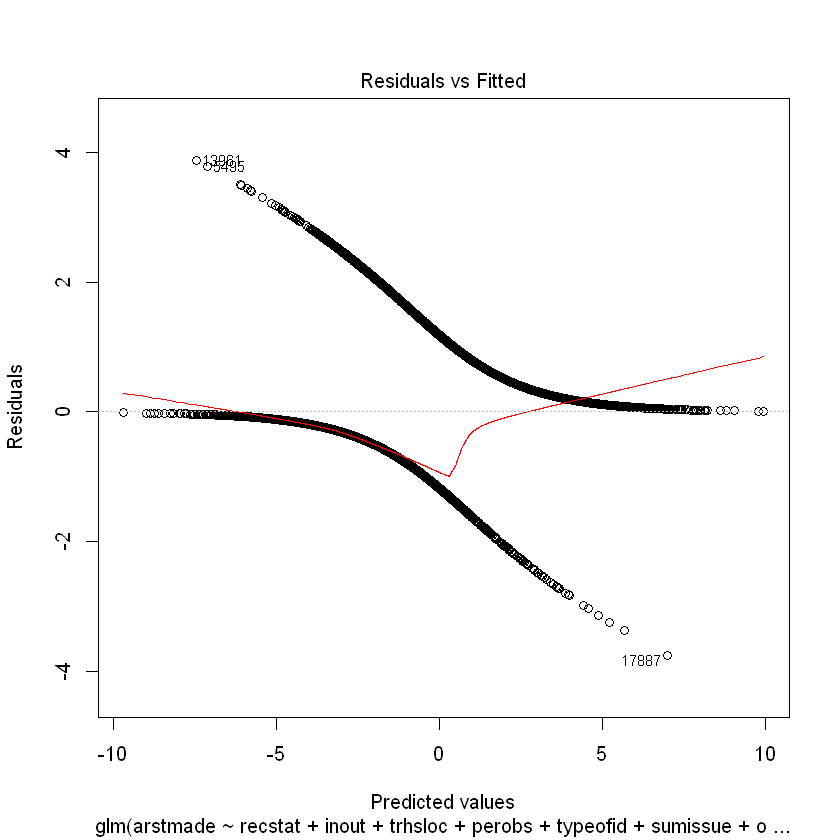

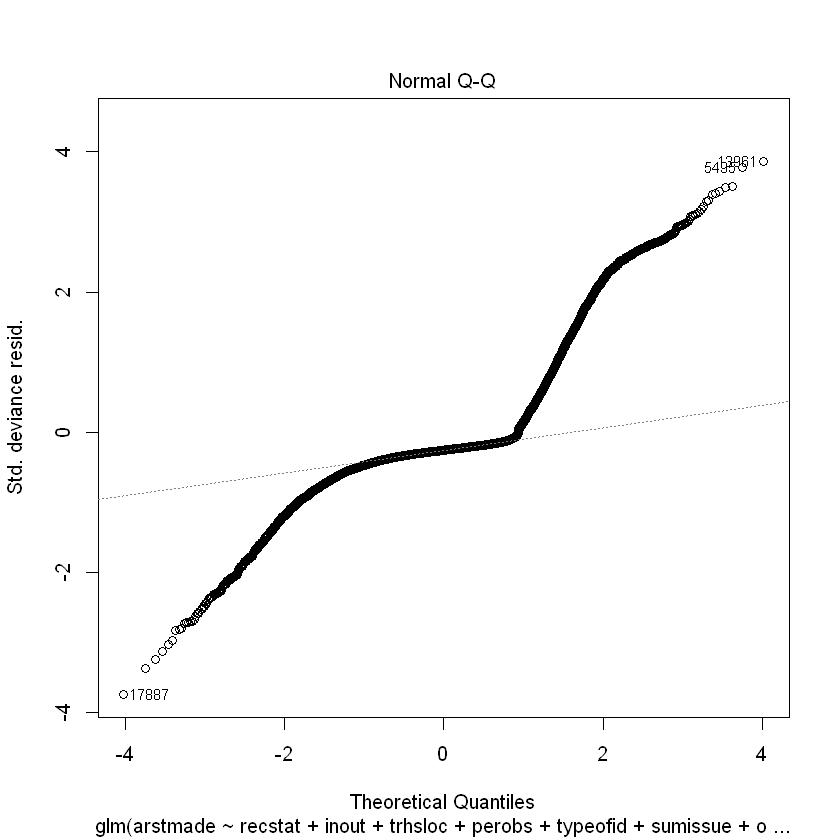

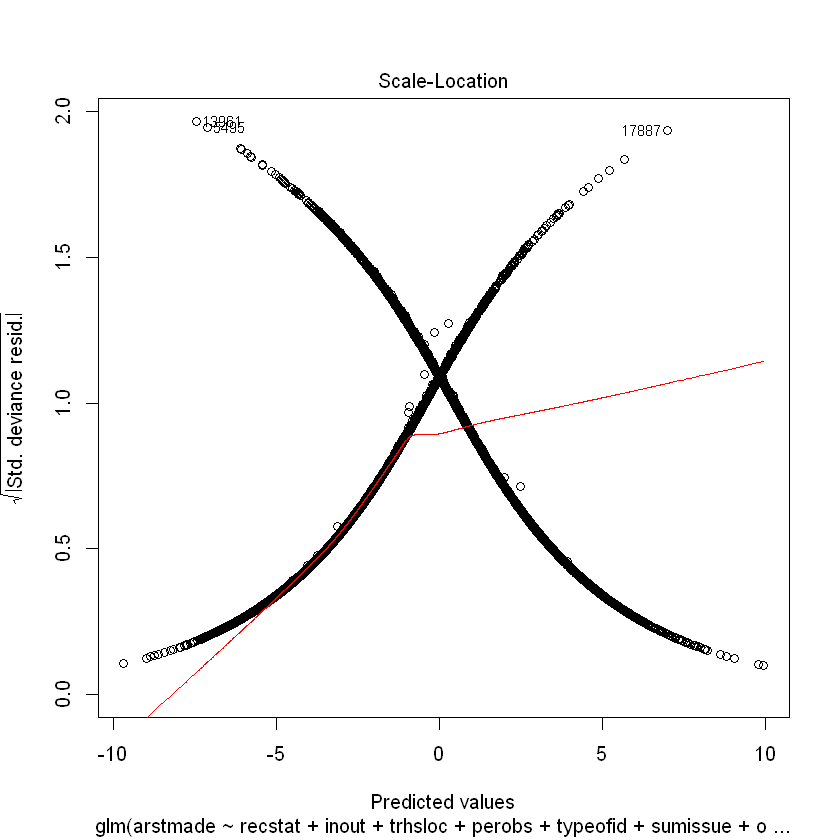

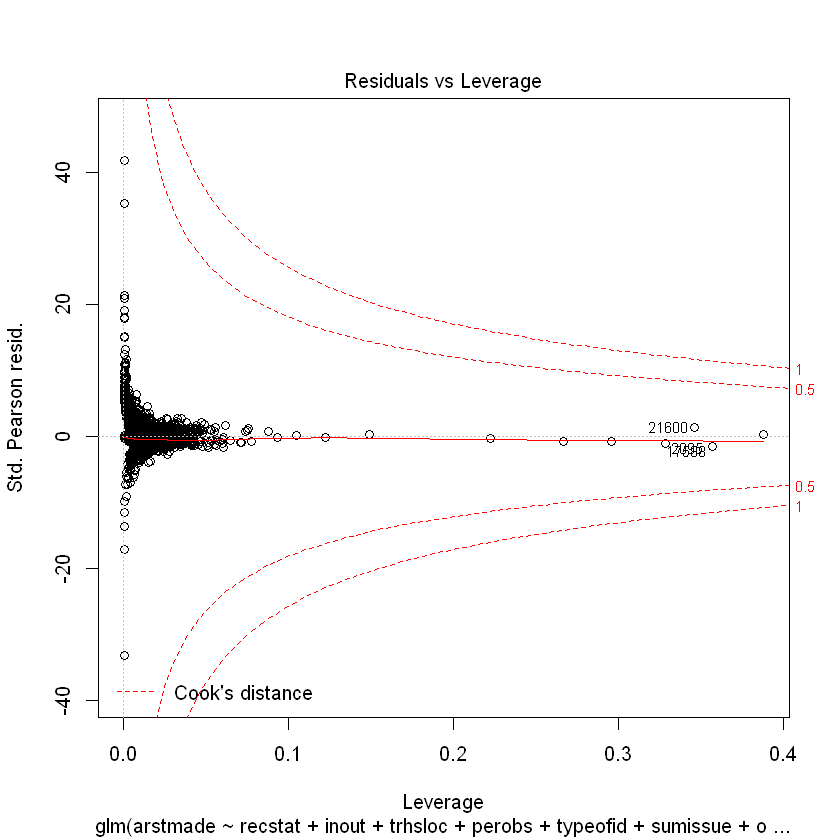

In [8]:
plot(stepwiselogmodel)

In [9]:
fit1 <- predict(stepwiselogmodel, newdata = mydata.test, type = "response")
fit1 <- ifelse(fit1 > 0.5, 1, 0)
sum(fit1)/nrow(mydata.test)

table1 <- table(fit1, arrest.test)
misclasserrorstepwise <- 1 - sum(diag(table1))/nrow(mydata.test)
round(misclasserrorstepwise, 3)

fitted3 <- ifelse(fit1 > 0.17, 1, 0)
sum(fitted3)/nrow(mydata.test)


fit2 <- predict(logistfullmodel, newdata = mydata.test, type = "response")
fitted2 <- ifelse(fit2 > 0.5, 1, 0)
sum(fitted2)/nrow(mydata.test)

table2 <- table(fitted2, arrest.test)
misclasserrorsfull <- 1 - sum(diag(table2))/nrow(mydata.test)
round(misclasserrorsfull, 3)

[1] 0.1272663

[1] 0.093

[1] 0.1272663

[1] 0.127444

[1] 0.095

In [11]:
table1

    arrest.test
fit1    N    Y
   0 4513  397
   1  126  590

In [12]:
misclasserrorsfull
table2
misclasserrorstepwise

[1] 0.09456097

       arrest.test
fitted2    N    Y
      0 4508  401
      1  131  586

[1] 0.09296125


Using the stepwise regression model determined by the AIC produced a marginally better misclassification error, from .095 to .093 (or 9.5 % to 9.3%). This isn't a very big improvement, though.

Surprisingly, the model does not find any of the race factors to be significant in determining whether an arrest was made or not besides Q, which stands for the White-Hispanics. That is, all of the levels of the "race" variable other than "White-Hispanic" came up insignificant. All of these coefficients are positive besides "U", which stood for "unknown", which essentially means that if the person's race was known, the odds of arrest are higher. The full summary of the stepwise regression is included in the appendix(1).

When the stepwise regression was performed, we could see that contraband and knife/cutting instrument variables were highly significant in determining whether a person would get arrested or not. These variables are both very significant in the reduced logistic model.

The variables that represent the different boroughs were all found to be significant, all with negative values. This suggests that the variable that was not included in the factors (the Bronx) had a higher likelihood of being arrested than any of the other four boroughs. Since the largest coefficient is that of Staten Island it means that, all else equal, a person from Staten Island who was stopped and frisked was less likely to be arrested than a person from Manhattan.

The model also indicates that people who had a weapon were more likely to be arrested during a stop and frisk. This is logical, as if the police had found a weapon, it is quite likely that the person would be arrested. If the officer was in uniform, interestingly, a person would be less likely to be arrested, according to the model. If the police officer stopped the person because they knew them (indicated by rf_knowlY), the person was less likely to be arrested.

If the reason the officer used force was to defend themselves, the person was less likely to be arrested than if the reason for force was that the person was suspected of running away. If the person is searched, they had a higher chance of being arrested than if they were not searched.

# KNN

The next model I used was the K-Nearest Neighbors approach. K-Nearest Neighbors is a non-parametric method, so it does not make assumptions about the underlying distribution of the variables. K-Nearest Neighbors works by finding the nearest data points to the ones you are testing them against and assigning a classification based on the nearest k points. I have used k=5 and k=10 in this model to see if they can accurately predict the chances of arrest.

Below are the tables for predicted vs actual arrest values for the test set, as well as the misclassification error, for the 10-nearest neighbor method (as this was the most successful.)



In [14]:
train1 <- model.matrix(arstmade ~ ., data = mydata[train, ])
test1 <- model.matrix(arstmade ~ ., data = mydata.test)
knn.predict <- knn(train1, test1, arstmade[train], k = 10)

table3 <- table(knn.predict, arrest.test)
KNNMisclass <- 1 - sum(diag(table3))/nrow(mydata.test)
round(KNNMisclass, 3)

train2 <- model.matrix(arstmade ~ ., data = mydata[train, ])[, 7:60]
test2 <- model.matrix(arstmade ~ ., data = mydata.test)[, 7:60]
knn.predict2 <- knn(train2, test2, arstmade[train], k = 5)

table4 <- table(knn.predict2, arrest.test)
KNNMisclass2 <- 1 - sum(diag(table4))/nrow(mydata.test)
round(KNNMisclass2, 3)

[1] 0.162

[1] 0.12

In [15]:
table3
round(KNNMisclass, 3)

           arrest.test
knn.predict    N    Y
          N 4479  749
          Y  160  238

[1] 0.162

The 10-Nearest Neighbor model was the most successful of the different k's I used (I tried 1, 5, 10, and 20). Still, it doesn't produce very good outcomes compared to the logistic model. In fact, if I were to guess that none of the people would get arrested, I would have an error of about 18%, so this model is only marginally better than the trivial method.
The failure of this method is due to the fact that the variables cannot exactly be scaled, and the distances are affected by this. As there are many categorical variables and few continuous ones, high numbers of the continuous variables may have influenced the predictions, since the KNN function in R uses Euclidian distances to predict the outcomes.

To rectify this, I perform the K-NN method using only the categorical variables. The predictions are slightly better in this model, as shown by the confusion matrix and misclassification rate below.


In [16]:
table4
round(KNNMisclass2, 3)

            arrest.test
knn.predict2    N    Y
           N 4547  582
           Y   92  405

[1] 0.12

Interestingly, while the error is still larger than the logistic models, or in fact any of the models I used in the analysis, it is more accurate at predicting an arrest when an arrest was made than any of the earlier models, suggested by the second row of the confusion matrix above. That is, while it produces more overall error than any of the models I've used, it also produces the smallest type I error out of any of the models (the false positives).

# Tree-Based Methods

I will now use tree-based methods (a single tree, Random Forest, Bagging and Boosting) in order to predict whether a person will be arrested or not.

The first model I use will be an unpruned tree using all the variables. The tree selects groupings of the variables which produces the least errors in predictions, and lists decision trees based on the conditional results of each tree. It determines these factors by a popular vote in the case of classification trees, so that the most common outcome is the one which is predicted by the
tree. The tree is posted below.



In [17]:
tree.arrest <- tree(arstmade ~ ., mydata[train, ])

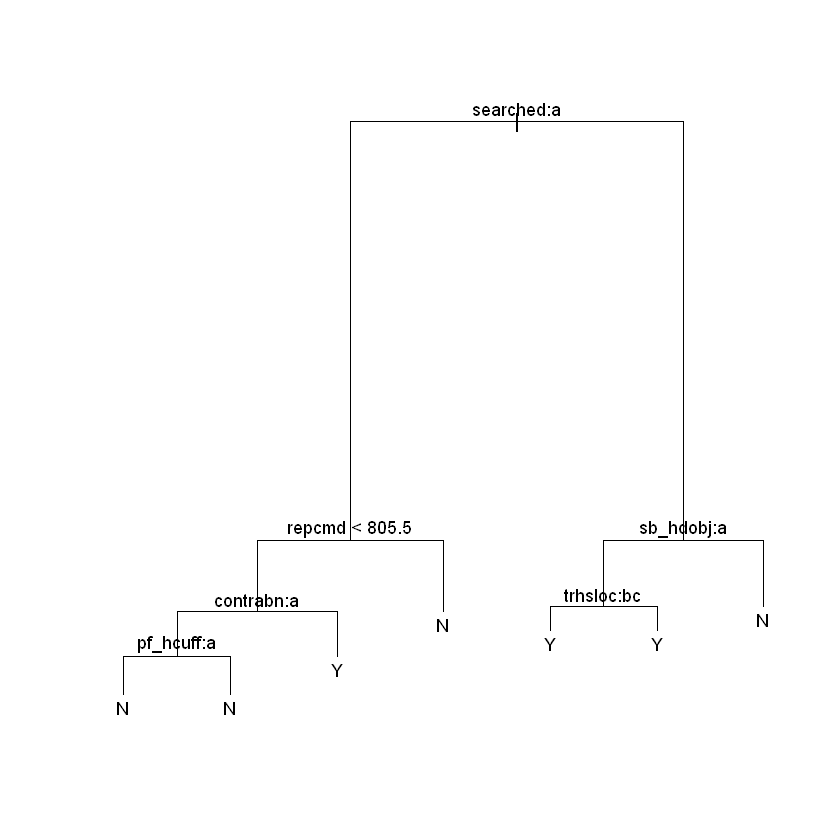

In [18]:
plot(tree.arrest, main = "Unpruned Tree")
text(tree.arrest, cex = 0.9)

This tree has six nodes, so it is relatively simple. If the statement is true, you go to the right, and if it is false you go to the left. The top node is whether the person was searched or not. This makes sense, as if a person is searched, the police are more likely to find a reason to arrest the person (because of illegal goods, etc).

It is already evident that this tree can be pruned. For the trhsloc and pf_hcuff variables, either decision results in the same response. This means that the variable is redundant, and can be removed from the tree. The values that are included are: searched, repcmd (reporting officers command, which takes values from 1 to 999), contrabn (contraband), sb_hdobj (basis of search being a hard object), trhsloc P,T (whether the location was a transit location or housing location), and pf_hcuff(force used was handcuffing).

Some of these are quite interesting: the fact that the officers command has an influence on whether the person was arrested or not, and also the fact that regardless of whether the person was handcuffed or not, they were not reported as arrested if they reach the bottom left node. This defies our common sense - as we often expect someone who is handcuffed to be arrested. Based on the prior conditional factors, the tree says that if someone is handcuffed given they don't have contraband, they weren't searched, and the reporting officers command was less than 805, they would be classified as not being arrested.

Since we already have seen that we should prune this tree, I will find the correct number of nodes to prune to by plotting the cross-validation errors.


In [19]:
cv.arrest <- cv.tree(tree.arrest, FUN = prune.misclass)

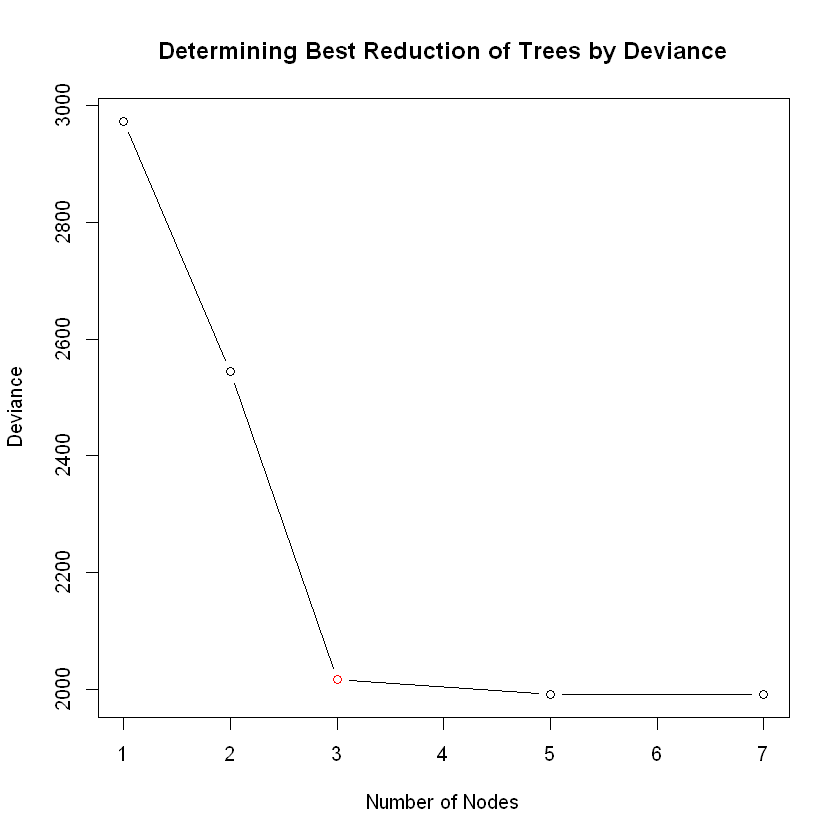

In [20]:
plot(cv.arrest$size, cv.arrest$dev, type = "b", xlab = "Number of Nodes", ylab = "Deviance", 
    main = "Determining Best Reduction of Trees by Deviance")
points(3, cv.arrest$dev[3], col = "red")

There is a clear leveling off at 3, marked with a red point, so we will prune the next tree to three nodes.


In [21]:
prune.arrest <- prune.misclass(tree.arrest, best = 3)

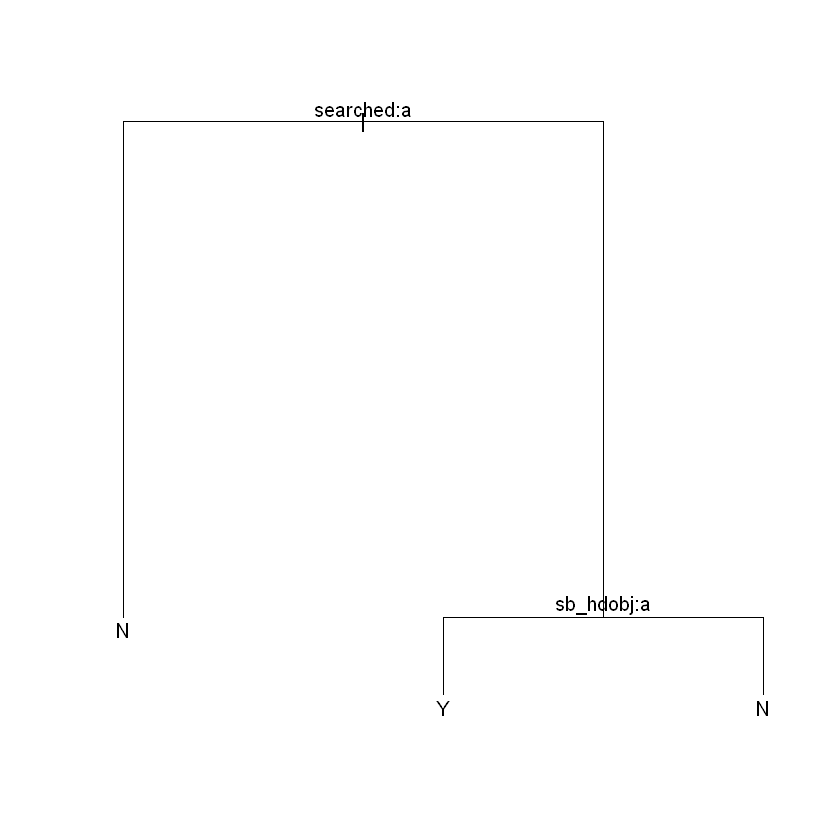

In [22]:
plot(prune.arrest)
text(prune.arrest)

This tree is extremely small, and only considers two variables - whether a person was searched and whether the reason for the search was that they had a hard object.

Below, I post the tables for the pruned and unpruned trees, along with their misclassification errors.


In [23]:
tree.pred <- predict(tree.arrest, newdata = mydata.test, type = "class")
table5 <- table(tree.pred, arrest.test)

misclassificationunprune <- 1 - sum(diag(table5))/nrow(mydata.test)

pruned.pred <- predict(prune.arrest, newdata = mydata.test, type = "class")
table6 <- table(pruned.pred, arrest.test)
misclassificationprune <- 1 - sum(diag(table6))/nrow(mydata.test)

In [24]:
table5
round(misclassificationunprune, 3)
table6
round(misclassificationprune, 3)

         arrest.test
tree.pred    N    Y
        N 4426  447
        Y  213  540

[1] 0.117

           arrest.test
pruned.pred    N    Y
          N 4466  486
          Y  173  501

[1] 0.117

The misclassification errors are quite high for the single trees, which is expected since one tree will rarely be sufficient in predicting the outcome. They perform roughly the same on the data, which indicates that the pruning was effective - we were able to reduce the nodes without significantly effecting the accuracy of the models. It is notable that the pruned tree reduced Type I error, which is more desirable in this case. Still, both trees performed better on the overall error than the KNN approach.

Next, I will use the bagging method. The bagging method, or bootstrap aggregation, uses bootstrap samples repeatedly to create many trees, and then averages these trees to make predictions. In the case of a classification problem such as this one, bagging will predict by the majority vote.

Performing bagging with 300 trees reports the following confusion matrix and misclassification error:



In [25]:
bag.arrest <- randomForest(arstmade ~ ., data = mydata[train, ], mtry = (ncol(mydata) - 
    1), importance = TRUE, ntree = 300)
bag.pred <- predict(bag.arrest, newdata = mydata.test, type = "class")
table7 <- table(bag.pred, arrest.test)

misclassificationbagging <- 1 - sum(diag(table7))/nrow(mydata.test)

In [26]:
table7
round(misclassificationbagging, 3)

        arrest.test
bag.pred    N    Y
       N 4505  285
       Y  134  702

[1] 0.074

This is a large improvement over any of the previous methods we have used. In order to make the results more easily interpretable and prevent overfitting, I will reduce the number of trees used. Looking at the plot below can help us determine the correct number of trees to use :



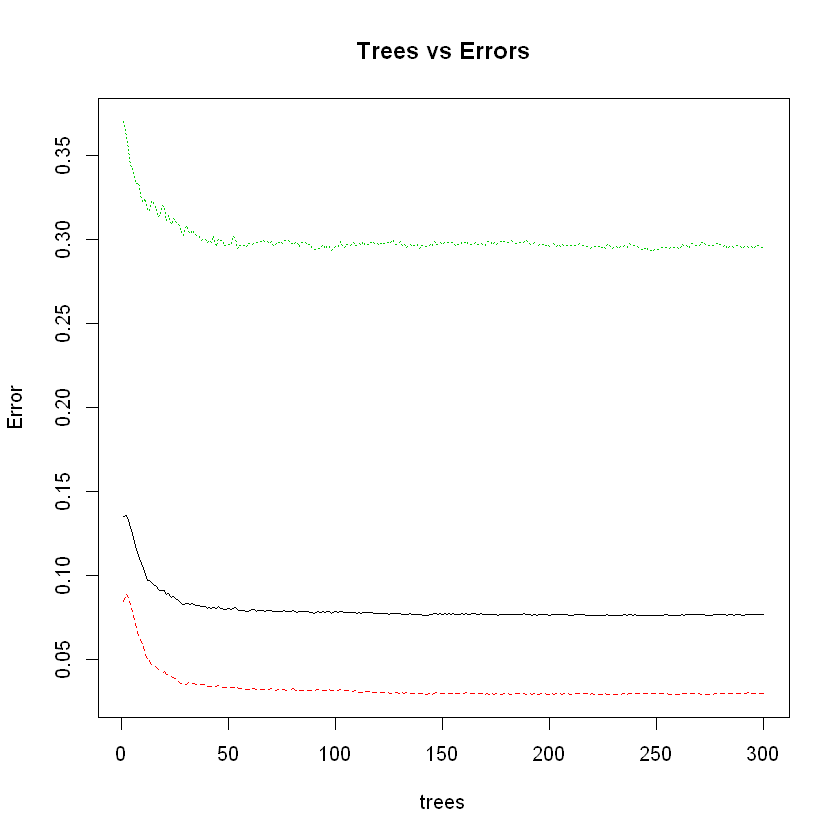

In [27]:
plot(bag.arrest, main = "Trees vs Errors")

This plot determines the errors produced by each amount of trees. Using this, we can see visually where the line appears to stabilize and use this information to minimize the loss in accuracy from removing the trees. The green line shows the errors for the affirmative case (which is more likely), the red line for the negative case, and the black line for the overall error (the same as the misclassification error above).

The plot appears to level off at around n=25. When I recreated the model using only 25 trees, I found the misclassification error to be 0.076. The error and confusion matrix will be included in the appendix. Although this is slightly higher than the model using 300 trees, it it a very small reduction in accuracy for a rather large increase in the interpretability and utility of the model.
Now that we have determined a good amount of trees, we can look at an importance plot to see which variables create the most variations in the errors. Since this is a categorical variable, it will be most useful to use the right graph, which uses the Gini index.



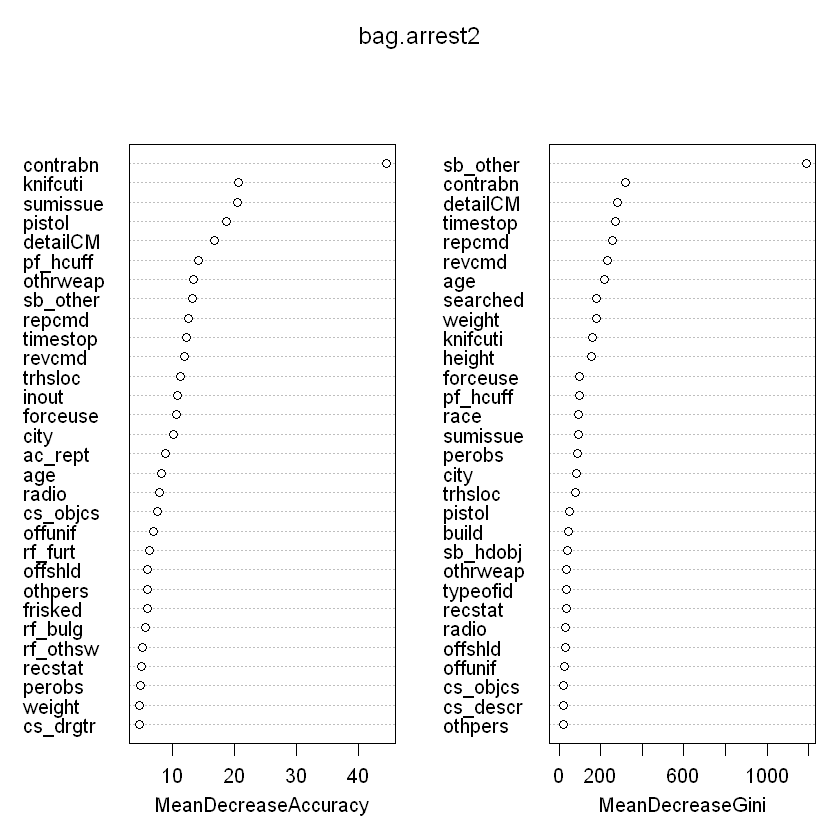

In [28]:
bag.arrest2 <- randomForest(arstmade ~ ., data = mydata[train, ], mtry = (ncol(mydata) - 
    1), importance = TRUE, ntree = 25)
bag.pred2 <- predict(bag.arrest2, newdata = mydata.test, type = "class")
table8 <- table(bag.pred2, arrest.test)

misclassificationbagging2 <- 1 - sum(diag(table8))/nrow(mydata.test)
varImpPlot(bag.arrest2)

The variable with the most importance is sb_other, which is reason for search:other. This is a troubling thing, as described in the data section, because this is not a very informative variable. We can see that race now does have some importance in determining the arrests, as well as some other variables that were ommited from the logistic regression model. Interestingly, age, weight and height are included
quite highly as well. Once again, whether the person was searched, had contraband, or was handcuffed is determined as important, which is consistent with our findings from the logistic regression.

By using a sample of the variables in each tree and performing the bagging method on a different subset for each iteration, we can implement a Random Forest method. This method is useful since it allows some variation in the trees, since they will not only be dominated by the most important variables. Using two numbers for the number of variables used, I produced two random forest models. Below are their confusion matrices and misclassification errors.


In [29]:
table7
misclassificationbagging
table8
misclassificationbagging2

        arrest.test
bag.pred    N    Y
       N 4505  285
       Y  134  702

[1] 0.07447565

         arrest.test
bag.pred2    N    Y
        N 4490  277
        Y  149  710

[1] 0.07571987


The misclassification errors for the two are nearly identical. They perform very similarly to the bagging method. I would prefer the second model, as it predicts better in the case that the prediction and observed value are both yes than they are both no.

By using a similar method to the bagging method earlier, we determine a good reduction in the amount of trees is to 40. Using 40 trees, we get the following confusion matrix and misclassification error.



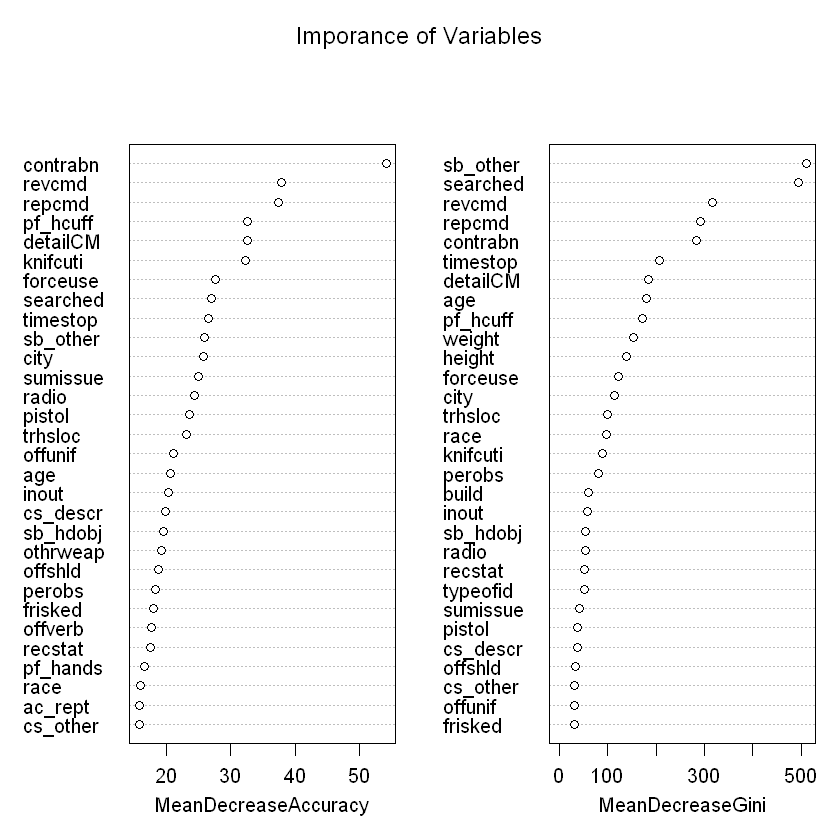

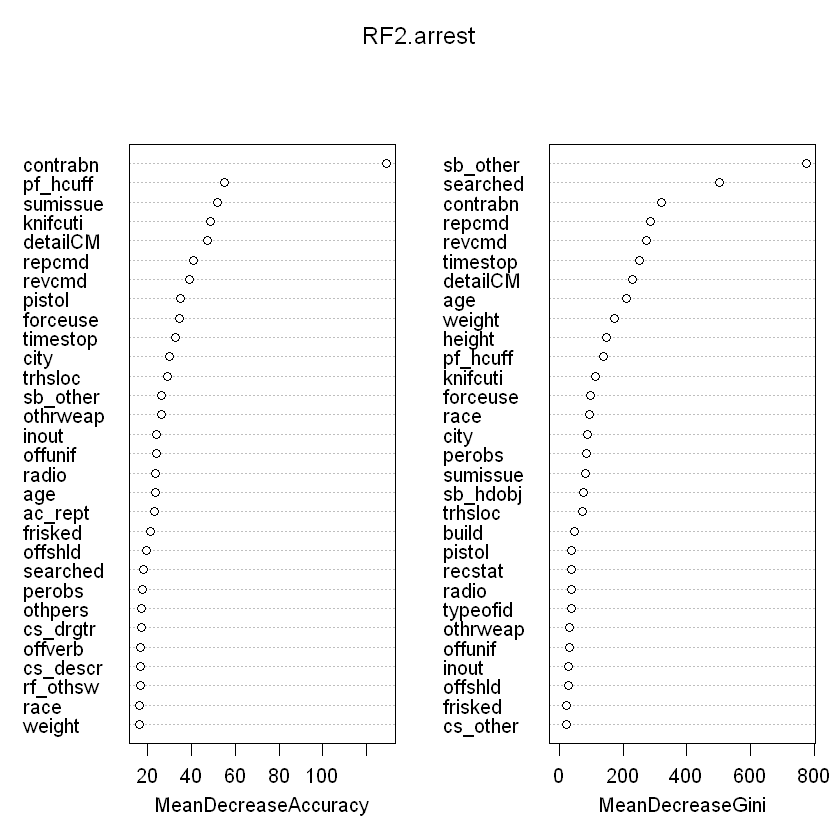

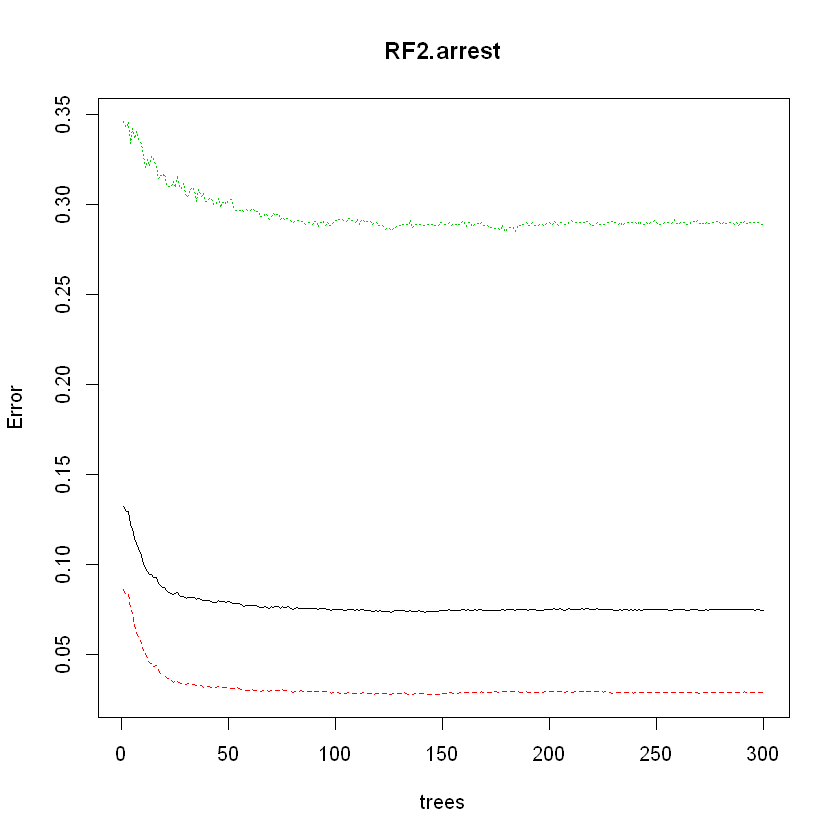

In [30]:
RF.arrest <- randomForest(arstmade ~ ., data = mydata[train, ], mtry = 9, importance = TRUE, 
    ntree = 300)
RF.pred <- predict(RF.arrest, newdata = mydata.test, type = "class")
table9 <- table(RF.pred, arrest.test)
misclassRF <- 1 - sum(diag(table9))/nrow(mydata.test)
varImpPlot(RF.arrest, main = "Imporance of Variables")


RF2.arrest <- randomForest(arstmade ~ ., data = mydata[train, ], mtry = (ncol(mydata) - 
    1)/2, importance = TRUE, ntree = 300)
RF2.pred <- predict(RF2.arrest, newdata = mydata.test, type = "class")
table10 <- table(RF2.pred, arrest.test)
misclassRF2 <- 1 - sum(diag(table10))/nrow(mydata.test)
varImpPlot(RF2.arrest)

plot(RF2.arrest)

RF3.arrest <- randomForest(arstmade ~ ., data = mydata[train, ], mtry = (ncol(mydata) - 
    1)/2, importance = TRUE, ntree = 40)
RF3.pred <- predict(RF3.arrest, newdata = mydata.test, type = "class")
table11 <- table(RF3.pred, arrest.test)
misclassRF3 <- 1 - sum(diag(table11))/nrow(mydata.test)

In [31]:
table11
misclassRF3

        arrest.test
RF3.pred    N    Y
       N 4515  293
       Y  124  694

[1] 0.07412016

In this case, the error actually was reduced. This can be accounted for by the fact that it simplified the model, which resulted in the random forest model with 40 trees actually predicting better than the more complex model. This suggests that the increase in bias by using a simpler model with 40 trees was less than the decrease in variance of the model on the testing data. This model performs the best of all the models I have used, and is the most successful at predicting whether a person is arrested or not when they are stopped and frisked, with about a 7.2% misclassification rate.

# Conclusions
Below is a table summarizing all of the models that I've used, and their misclassifcation errors on the test data.



In [32]:
Method <- c("Full Logistic Model", "Reduced Logistic Model", "10-NN Full Model", 
    "5-NN Reduced Model", "Pruned Tree", "Unpruned Tree", "Bagging (n=300)", "Bagging (n=25)", 
    "Random Forest I (n=300)", "Random Forest II (n=300)", "Random Forest III (n=40)")

TestError <- c(misclasserrorsfull, misclasserrorstepwise, KNNMisclass, KNNMisclass2, 
    misclassificationprune, misclassificationunprune, misclassificationbagging, misclassificationbagging2, 
    misclassRF, misclassRF2, misclassRF3)


TestError <- round(TestError, 3)

data.frame(Method, TestError)


# error: Yes when No
Er1 <- table1[2, 1]/sum(table1[2, ])
Er2 <- table2[2, 1]/sum(table2[2, ])
Er3 <- table3[2, 1]/sum(table3[2, ])
Er4 <- table4[2, 1]/sum(table4[2, ])
Er5 <- table5[2, 1]/sum(table5[2, ])
Er6 <- table6[2, 1]/sum(table6[2, ])
Er7 <- table7[2, 1]/sum(table7[2, ])
Er8 <- table8[2, 1]/sum(table8[2, ])
Er9 <- table9[2, 1]/sum(table9[2, ])
Er10 <- table10[2, 1]/sum(table10[2, ])
Er11 <- table11[2, 1]/sum(table11[2, ])

# error: No when Yes
Er21 <- table1[1, 2]/sum(table1[1, ])
Er22 <- table2[1, 2]/sum(table2[1, ])
Er23 <- table3[1, 2]/sum(table3[1, ])
Er24 <- table4[1, 2]/sum(table4[1, ])
Er25 <- table5[1, 2]/sum(table5[1, ])
Er26 <- table6[1, 2]/sum(table6[1, ])
Er27 <- table7[1, 2]/sum(table7[1, ])
Er28 <- table8[1, 2]/sum(table8[1, ])
Er29 <- table9[1, 2]/sum(table9[1, ])
Er210 <- table10[1, 2]/sum(table10[1, ])
Er211 <- table11[1, 2]/sum(table11[1, ])

FalsePositive <- round(c(Er1, Er2, Er3, Er4, Er5, Er6, Er7, Er8, Er9, Er10, Er11), 
    3)
FalseNegative <- round(c(Er21, Er22, Er23, Er24, Er25, Er26, Er27, Er28, Er29, Er210, 
    Er211), 3)

Method,TestError
Full Logistic Model,0.095
Reduced Logistic Model,0.093
10-NN Full Model,0.162
5-NN Reduced Model,0.120
Pruned Tree,0.117
Unpruned Tree,0.117
Bagging (n=300),0.074
Bagging (n=25),0.076
Random Forest I (n=300),0.074
Random Forest II (n=300),0.073


In [33]:
data.frame(Method, TestError, FalsePositive, FalseNegative)

Method,TestError,FalsePositive,FalseNegative
Full Logistic Model,0.095,0.176,0.081
Reduced Logistic Model,0.093,0.183,0.082
10-NN Full Model,0.162,0.402,0.143
5-NN Reduced Model,0.120,0.185,0.113
Pruned Tree,0.117,0.283,0.092
Unpruned Tree,0.117,0.257,0.098
Bagging (n=300),0.074,0.160,0.059
Bagging (n=25),0.076,0.173,0.058
Random Forest I (n=300),0.074,0.137,0.064
Random Forest II (n=300),0.073,0.146,0.060


I have also included the false positive and false negative results, as these can help to determine which models fit the best.

The Random Forest model which used 40 trees and 39 variables performed the best out of all the methods used. It is clear that the bagging and random forest methods were superior to the logistic and KNN methods. Of the simpler methods, the reduced Logistic Model using stepwise reduction with the AIC performed the best.

Despite my original inclinations, we can see from the importance plots on the bagging model and the summaries of the logistic model that race was not a very significant factor in determining whether a person would be arrested or not. However, as we saw before from the bar graphs, there was a significantly larger portion of blacks who were stopped and frisked than the general population. This suggests that a black person is more likely to be stopped, but not significantly more or less likely than other races to be arrested after they are stopped. Which raises the question: why stop more black people if they are no more likely to be arrested after the frisk than other races?

Another variable of interest was sb_other. This variable indicates that there was an "other reason for stopping the subject." As such, this variable is difficult to interpret. However, the variable was quite significant with a high coefficient in the logistic model, and was rated as the most important variable by a large margin in the bagging models. This is a point of difficulty in the interpretations. This may indicate that there needs to be more disclosure about the reason a person was searched, since the sb variables in their current state fail to capture much of the reasons for arrest.
In both the logisitic and bagging methods, the variables for contraband and knife/cutting object came up as significant, and had a significant effect on whether the person was arrested or not. This is logical: if the officer found a weapon on contraband on the person, they were much more likely to be arrested. This was far more significant than other factors about the person, in particular the cs variables, which list the reasons why the person was stopped, or the age, weight, gender and race variables, which are the physical attributes of the person. This suggests that the physical attributes of a person are not nearly as important as criminal possession in predicting an arrest, which is in support of the stop and frisk's usage.

For instance, being stopped due to the clothing you wear (cs_cloth) or being perceived as a lookout (cs_lkout) were not nearly as significant as carrying a suspicious object (cs_object) or if they were searched (searched), and actually had negative coefficients.  So it appears that, most of the time, the probability of being arrested was largely reliant on whether the person was searched or not, or found to have an object. This matches up with the significance and postive coefficient of cs_drgtr, which was the variable representing the cause of search being for a suspected drug transaction. One would conclude that if a person was being suspected for a drug transaction, they would also be more likely to have contraband or perhaps a weapon than if they were not.

Interestingly, the frisked variable was not found to be significant in the logistic regression model, suggesting that frisking, as compared to searching, was not very significant in arrest, and therefore not too effective a measure to stop criminal activity. In both models, searching had a stronger effect than frisking in determining whether a person was arrested or not.

The success of the random forest/bagging methods as compared to the simpler methods suggests that the relationship between whether a person is arrested or not and the various variables in the dataset is quite complex, and that it cannot be estimated as well using the simpler techniques.

